# Problem 2

The data is a subset of data from the [Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction/data). You will explore using Logistic Regression and SVM for this problem.

Data fields
- id: ad identifier
- click: 0/1 for non-click/click
- hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1 -- anonymized categorical variable
- banner_pos
- site_id
- site_domain
- site_category
- app_id
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- C14-C21 -- anonymized categorical variables

The input variables are 'hour' up to 'C21', however, we will not use all of them.
The output variable is 'click', which is a binary variable.

Let's first read the data!

In [22]:
import pandas as pd
import numpy as np
data = pd.read_csv('trainsubset.csv')


It is recommended to use only the first 10000 data for training the data. We will talk about the techniques to handle big data later

In [23]:
data = data.head(10000)

# Part 1: Training and testing split

Let's start with defining the training data matrix X and response y. 
You need to use get_dummies to create the dummy variable with these only selected columns. Please select the response y as the click rate.


In [24]:
selected_columns = ['C1','site_domain','app_id','app_domain','site_category','banner_pos','device_type','device_conn_type','C14','C15','C16','C17','C18','C19']
# Please put your code here to define the data matrix X and y
y = data['click']
data1= data[selected_columns]
X = pd.get_dummies(data1)
X.head()


,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,site_category_3e814130,site_category_50e219e0,site_category_72722551,site_category_75fa27f6,site_category_76b2941d,site_category_a818d37a,site_category_bcf865d9,site_category_c0dd3be3,site_category_f028772b,site_category_f66779e6
0,1005,0,1,2,15706,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
1,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
2,1005,0,1,0,15704,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
3,1005,0,1,0,15706,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,0,0
4,1005,1,1,0,18993,320,50,2161,0,35,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X.shape

(10000, 685)

In [26]:
y.values.reshape(-1,1)

array([[0],
       [0],
       [0],
       ..., 
       [1],
       [0],
       [0]], dtype=int64)

In [27]:
y.shape

(10000,)

In [28]:
print('%d of zeros in response variable'%np.sum(y==0))
print('%d of ones in response variable'%np.sum(y==1))

8294 of zeros in response variable
1706 of ones in response variable


In [29]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

# Part 2.1: SVM

Let's Start with SVM. Please use svm.LinearSVC, Let's try to add balanced weight to handle the class-imbalance issue. 
 1. please compute the precision/recall, f1-score, and confusion matrix. 
 2. Please run the algorithm for multiple times and observe the result. 

In [30]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

In [31]:
X_train = preprocessing.scale(X_train1)
X_test = preprocessing.scale(X_test1)

In [33]:
clf = LinearSVC(class_weight='balanced',random_state=12)
clf.fit(X_train,y_train)
y_pred_SVC = clf.predict(X_test)
print(y_pred_SVC.sum())

1772


In [34]:
y_pred_SVC = (clf.predict(X_test))
cm = confusion_matrix(y_test, y_pred_SVC)
print(cm)

[[1403 1341]
 [ 125  431]]


In [35]:
print(classification_report(y_test,y_pred_SVC))
print(matthews_corrcoef(y_test,y_pred_SVC))

             precision    recall  f1-score   support

          0       0.92      0.51      0.66      2744
          1       0.24      0.78      0.37       556

avg / total       0.80      0.56      0.61      3300

0.215043354227


In [43]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=i)
    clf = LinearSVC(class_weight='balanced')
    X_train_SV = preprocessing.scale(X_train)
    X_test_SV = preprocessing.scale(X_test)
    clf.fit(X_train_SV,y_train)
    y_pred_SV = clf.predict(X_test_SV)
    conf = confusion_matrix(y_test, y_pred_SV)
    classif = classification_report(y_test,y_pred_SV)
    matt_ = matthews_corrcoef(y_test,y_pred_SV)
    print("for loop:",i,'\n',conf,'\n')
    print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)),'\n')

for loop: 0 
 [[1473 1259]
 [ 147  421]] 

Accuracy of SVM classifier on test set: 0.17 

for loop: 1 
 [[1426 1302]
 [ 147  425]] 

Accuracy of SVM classifier on test set: 0.81 

for loop: 2 
 [[1390 1356]
 [ 144  410]] 

Accuracy of SVM classifier on test set: 0.17 

for loop: 3 
 [[1388 1360]
 [ 141  411]] 

Accuracy of SVM classifier on test set: 0.17 

for loop: 4 
 [[1438 1296]
 [ 150  416]] 

Accuracy of SVM classifier on test set: 0.19 

for loop: 5 
 [[1407 1326]
 [ 162  405]] 

Accuracy of SVM classifier on test set: 0.83 

for loop: 6 
 [[1388 1347]
 [ 127  438]] 

Accuracy of SVM classifier on test set: 0.83 

for loop: 7 
 [[1427 1312]
 [ 162  399]] 

Accuracy of SVM classifier on test set: 0.83 

for loop: 8 
 [[1399 1301]
 [ 131  469]] 

Accuracy of SVM classifier on test set: 0.82 

for loop: 9 
 [[1390 1340]
 [ 122  448]] 

Accuracy of SVM classifier on test set: 0.83 



# Part 2.2 Regularized SVM

1. Let's try to add penalty, please exlpore the use of the 'l1' and'l2' penalty in Scikit-learn, Please also use cross validation to select the best tuning parameters C.
2. please compute the precision/recall, f1-score, and confusion matrix for 'l1' and 'l2' model with the best tuning paramter C.



In [84]:
Cs = [0.01,0.1,1,10,100,1000]
parameters = {'C':Cs}
svc = LinearSVC(random_state = 12, penalty = 'l1',class_weight = 'balanced',dual = False)
clf = GridSearchCV(svc, parameters,return_train_score=True,n_jobs =-1,cv=5)
clf.fit(X_train, y_train)
print('best parameters:',clf.best_params_,',testing accuracy:',clf.best_estimator_.score(X_test,y_test))
y_pred = clf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
classif = classification_report(y_test,y_pred)
matt_ = matthews_corrcoef(y_test,y_pred)
print("Confusion matrix",'\n',conf)
print('\n',"classification matrix",'\n\n',classif)
print("Correlation coefficient:",matt_)

best parameters: {'C': 0.1} ,testing accuracy: 0.549393939394
Confusion matrix 
 [[1368 1362]
 [ 125  445]]

 classification matrix 

              precision    recall  f1-score   support

          0       0.92      0.50      0.65      2730
          1       0.25      0.78      0.37       570

avg / total       0.80      0.55      0.60      3300

Correlation coefficient: 0.214018723881


In [85]:
Cs = [0.01,0.1,1,10,100,1000]
parameters = {'C':Cs}
svc = LinearSVC(random_state = 12, penalty = 'l2',class_weight = 'balanced',dual = False)
clf = GridSearchCV(svc, parameters,return_train_score=True,n_jobs =-1,cv=5)
clf.fit(X_train, y_train)
print('best parameters:',clf.best_params_,',testing accuracy:',clf.best_estimator_.score(X_test,y_test))
y_pred = clf2.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
classif = classification_report(y_test,y_pred)
matt_ = matthews_corrcoef(y_test,y_pred)
print("Confusion matrix",'\n',conf)
print('\n',"classification matrix",'\n\n',classif)
print("Correlation coefficient:",matt_)

best parameters: {'C': 0.01} ,testing accuracy: 0.554242424242
Confusion matrix 
 [[1384 1346]
 [ 125  445]]

 classification matrix 

              precision    recall  f1-score   support

          0       0.92      0.51      0.65      2730
          1       0.25      0.78      0.38       570

avg / total       0.80      0.55      0.61      3300

Correlation coefficient: 0.218277022473


# Part 3: Logistic Regression

Please also explore using Logistic Regression on this problem and report the result. 
1. Please plot the ROC curve and compute the area under the ROC curve. (You don't need to explore the use of penalty since the cross validation can be very slow)
2. Please plot the precision recall curve and compute the average precision
3. Please compute the F1-score and confusion matrix.

In [70]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(class_weight = 'balanced',random_state = 12)
LogReg.fit(X_train,y_train)
y_pred_LR = LogReg.predict(X_test)
y_score1 = LogReg.predict_proba(X_test)

In [71]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53


In [72]:
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

def ROC(label,result):
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(label, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.699871


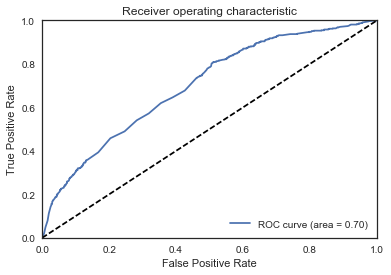

In [73]:
ROC(y_test,y_score1[:,1])

In [74]:
y_score1

array([[ 0.7894815 ,  0.2105185 ],
       [ 0.44762348,  0.55237652],
       [ 0.83393286,  0.16606714],
       ..., 
       [ 0.86689642,  0.13310358],
       [ 0.49514951,  0.50485049],
       [ 0.44768837,  0.55231163]])

Average precision-recall score: 0.34


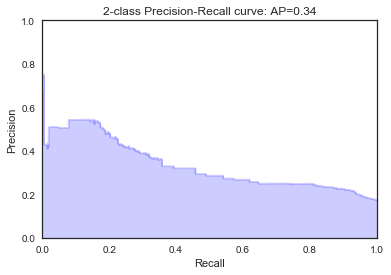

In [75]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score1[:,1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score1[:,1])
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [76]:
conf = confusion_matrix(y_test, y_pred_LR)
classif = classification_report(y_test,y_pred_LR)
print("Confusion matrix",'\n',conf)
print('\n',"classification matrix",'\n\n',classif)

Confusion matrix 
 [[1301 1429]
 [ 107  463]]

 classification matrix 

              precision    recall  f1-score   support

          0       0.92      0.48      0.63      2730
          1       0.24      0.81      0.38       570

avg / total       0.81      0.53      0.59      3300



# Part 4: Random Forest

Please also explore using Random Forest on this problem and report the result. 
1. Please use cross-validation to select the best tuning parameters
2. Please plot the ROC curve and compute the area under the ROC curve. 
3. Please plot the precision recall curve and compute the average precision
4. Please compute the F1-score and confusion matrix

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV

Rndf_clf = RandomForestClassifier(class_weight = 'balanced',random_state = 12)
print(np.mean(cross_val_score(Rndf_clf, X_train, y_train, cv=10)))
param_grid = {
    'max_depth':[2,4,8,16,32,64] ,
    'max_features': [0.1,0.2,0.3,0.5,0.9],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [4,8,16,32]}

grid_clf = GridSearchCV(Rndf_clf, param_grid, return_train_score=True,cv=3,n_jobs=-1)
grid_clf.fit(X_train, y_train)

0.611487620807


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 4, 8, 16, 32, 64], 'max_features': [0.1, 0.2, 0.3, 0.5, 0.9], 'min_samples_leaf': [2, 3, 4], 'min_samples_split': [2, 4, 6, 8], 'n_estimators': [4, 8, 16, 32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
y_pred_rf = grid_clf.predict(X_test)

In [79]:
score = grid_clf.score(X_test, y_test)
grid_clf.fit(X_train, y_train)
print('Accuracy:{},Best parameters:{}'.format(score,grid_clf.best_params_))

Accuracy:0.5842424242424242,Best parameters:{'max_depth': 16, 'max_features': 0.9, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 8}


In [80]:
def ROC(label,result):
    # Compute ROC curve and area the curve
    fpr2, tpr2, thresholds = roc_curve(label, result)
    roc_auc = auc(fpr2, tpr2)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


Area under the ROC curve : 0.686045


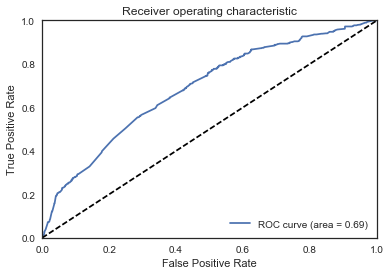

In [81]:
y_score2 = grid_clf.predict_proba(X_test)[:,1]
ROC(y_test,y_score2)

Average precision-recall score: 0.32


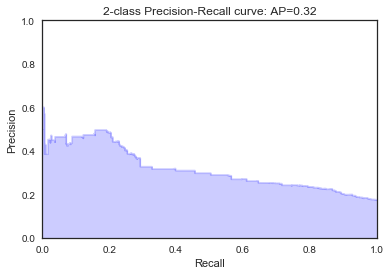

In [82]:
average_precision = average_precision_score(y_test, y_score2)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score2)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [83]:
conf = confusion_matrix(y_test, y_pred_rf)
classif = classification_report(y_test,y_pred_rf)
print("Confusion matrix",'\n',conf)
print('\n',"classification matrix",'\n\n',classif)

Confusion matrix 
 [[1526 1204]
 [ 168  402]]

 classification matrix 

              precision    recall  f1-score   support

          0       0.90      0.56      0.69      2730
          1       0.25      0.71      0.37       570

avg / total       0.79      0.58      0.63      3300



# Part 5: Gradient Boosting Tree
Please try to implement the xgboost library to this dataset. 
1. Please use cross-validation to select the best tuning parameters
2. Please plot the ROC curve and compute the area under the ROC curve. 
3. Please plot the precision recall curve and compute the average precision
4. Please compute the F1-score and confusion matrix

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=12), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=5)

param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}


In [33]:
gsearch1.fit(X_train, y_train)
score = gsearch1.score(X_test, y_test)

In [34]:
print('Accuracy:{},Best parameters:{}'.format(score,gsearch1.best_params_))

Accuracy:0.8321212121212122,Best parameters:{'max_depth': 3, 'min_child_weight': 5}


In [35]:
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=gsearch1.best_params_['max_depth'], min_child_weight=gsearch1.best_params_['min_child_weight'], gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=12),  param_grid = param_test3, scoring='accuracy',n_jobs=-1, cv=5)
gsearch2.fit(X_train, y_train)
score = gsearch2.score(X_test, y_test)    


In [36]:
print('Accuracy:{},Best parameters:{}'.format(score,gsearch2.best_params_))

Accuracy:0.8327272727272728,Best parameters:{'gamma': 0.3}


In [37]:
def ROC(label,result):
    # Compute ROC curve and area the curve
    fpr2, tpr2, thresholds = roc_curve(label, result)
    roc_auc = auc(fpr2, tpr2)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()



Area under the ROC curve : 0.681337


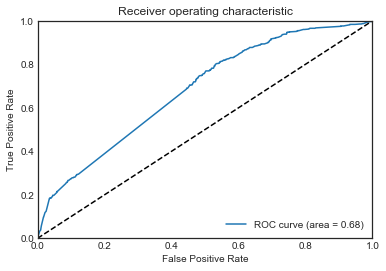

In [38]:
y_score2 = gsearch2.predict_proba(X_test)[:,1]
ROC(y_test,y_score2)

Average precision-recall score: 0.30


Text(0.5,1,'2-class Precision-Recall curve: AP=0.30')

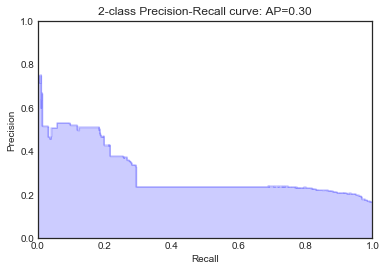

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score2)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score2)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [40]:
y_pred_xgb = gsearch2.predict(X_test)

In [41]:
conf = confusion_matrix(y_test, y_pred_xgb)
classif = classification_report(y_test,y_pred_xgb)
print("Confusion matrix",'\n',conf)
print('\n',"classification matrix",'\n\n',classif)

Confusion matrix 
 [[2740    4]
 [ 548    8]]

 classification matrix 

              precision    recall  f1-score   support

          0       0.83      1.00      0.91      2744
          1       0.67      0.01      0.03       556

avg / total       0.81      0.83      0.76      3300

